In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data loaded

In [195]:
df = pd.read_csv("loan.csv")
df.head()

C:\Users\samuv\AppData\Local\Temp\ipykernel_18456\3660473872.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [196]:
df.shape

(39717, 111)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Cleaning data

In [198]:
pd.set_option("display.max_rows",111)
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [199]:
df.dropna(axis=1, how='all', inplace=True)
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [200]:
df.drop(["emp_title","emp_length", "desc", "mths_since_last_delinq","mths_since_last_record", "next_pymnt_d"], axis=1, inplace=True)


In [201]:
df = df[-df['title'].isnull()]
df = df[-df['revol_util'].isnull()]
df = df[-df['last_pymnt_d'].isnull()]
df = df[-df['last_credit_pull_d'].isnull()]
df = df[-df['collections_12_mths_ex_med'].isnull()]
df = df[-df['pub_rec_bankruptcies'].isnull()]
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

In [202]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec     

In [203]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Filtering data

In [204]:
df.drop(['id', 'member_id', 'grade', 'sub_grade', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'url', 'title', 'zip_code', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',  ], axis=1, inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65%,162.87,RENT,24000.0,Verified,Dec-11,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,60 months,15.27%,59.83,RENT,30000.0,Source Verified,Dec-11,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,36 months,15.96%,84.33,RENT,12252.0,Not Verified,Dec-11,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,36 months,13.49%,339.31,RENT,49200.0,Source Verified,Dec-11,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,60 months,12.69%,67.79,RENT,80000.0,Source Verified,Dec-11,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


In [205]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
dtype: object

In [206]:
df.loan_status.unique

<bound method Series.unique of 0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39475     Fully Paid
39551     Fully Paid
39562     Fully Paid
39573     Fully Paid
39623    Charged Off
Name: loan_status, Length: 38889, dtype: object>

In [207]:
pd.set_option("display.max_rows",None)
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
dtype: object

### Int_rate

In [208]:
df["int_rate"].dtype

dtype('O')

In [209]:
df["int_rate"].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [210]:
df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%", ""))) 

In [211]:
df["int_rate"].dtype

dtype('float64')

### verification_status

In [213]:
df["verification_status"].value_counts(ascending=False)

Not Verified       16153
Verified           12777
Source Verified     9959
Name: verification_status, dtype: int64

In [214]:
df["verification_status"] = df["verification_status"].apply(lambda x: "Verified" if x=="Source Verified" else x)

In [215]:
df["verification_status"].value_counts(ascending=False)

Verified        22736
Not Verified    16153
Name: verification_status, dtype: int64

 ### Unordered categorical variable

### Verification status

In [221]:
df["verification_status"].value_counts(ascending=False)

Verified        22736
Not Verified    16153
Name: verification_status, dtype: int64

In [224]:
colors = ["teal", "lime", "goldenrod", "steelblue", "gold" ]
font_settings_title = {"fontsize":15, "fontweight":5, "color":"b"}
font_settings_axis = {"fontsize":15, "fontweight":5, "color":"black"}
t_font = {'fontname':'Georgia'}
a_font = {'fontname':'Times New Roman'}
ticks = [10,100,1000,10000]
labels = ticks

In [225]:
slices = df["verification_status"].value_counts(ascending=False)
colors_pie = ["#e5ae37", "#6d904f"]
labels = df["verification_status"].value_counts(ascending=False).keys()

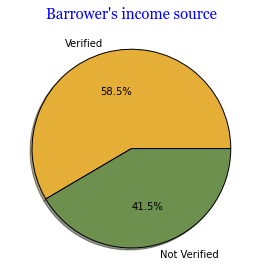

In [226]:
plt.pie(slices, wedgeprops={'edgecolor':'black'}, colors=colors_pie, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Barrower's income source", fontdict=font_settings_title, **t_font)
plt.tight_layout()
plt.show()

### Ordered categorical variable

In [233]:
df["term"].value_counts()

 36 months    28292
 60 months    10597
Name: term, dtype: int64

In [234]:
slices = df["term"].value_counts(ascending=False)
colors_pie = ["navy", "lime"]
labels = df["term"].value_counts(ascending=False).keys()

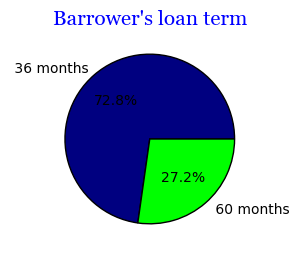

In [235]:
plt.style.use("default")
plt.figure(figsize=(3,3))
plt.pie(slices, wedgeprops={'edgecolor':'black'}, colors=colors_pie, labels=labels, autopct="%1.1f%%")
plt.title("Barrower's loan term", fontdict=font_settings_title, **t_font)
plt.tight_layout()
plt.show()

### Quantitative variable

### Int_rate

In [236]:
df["int_rate"].describe()

count    38889.000000
mean        12.037746
std          3.742412
min          5.420000
25%          9.250000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64

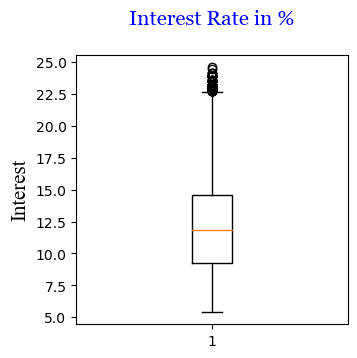

In [237]:
plt.figure(figsize=(3.5,3.5))
plt.boxplot(df["int_rate"])
plt.title("Interest Rate in %\n", fontdict=font_settings_title, **t_font)
plt.ylabel("Interest", fontdict=font_settings_axis, **a_font)
plt.show()

In [238]:
bins = np.arange(0,30,5)

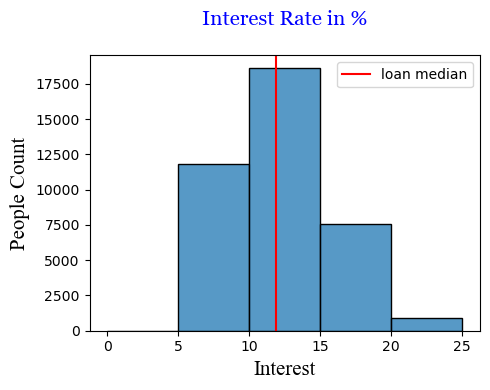

In [239]:
plt.figure(figsize=(5,4))
sns.histplot(df["int_rate"], bins=bins)
plt.title("Interest Rate in %\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Interest", fontdict=font_settings_axis, **a_font)
plt.ylabel("People Count", fontdict=font_settings_axis, **a_font)
plt.axvline(df["int_rate"].median(), color="red", label="loan median", linewidth=1.5)
plt.legend()
plt.tight_layout()
plt.show()

### Segmented Univariate Analysis

In [240]:
df_grp_loan_status = df.groupby("loan_status")

In [241]:
df_grp_loan_status.describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5422.0,12156.279970,8096.347126,1000.0,5875.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32327.0,10900.237418,7216.738495,500.0,5275.0,9600.0,15000.0,35000.0


<AxesSubplot:xlabel='loan_status'>

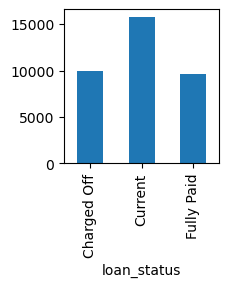

In [242]:
plt.figure(figsize=(2,2))
df_grp_loan_status.median()["loan_amnt"].plot.bar()

<AxesSubplot:xlabel='loan_status'>

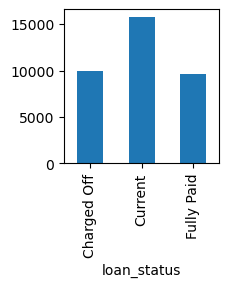

In [243]:
plt.figure(figsize=(2,2))
df_grp_loan_status.median()["loan_amnt"].plot.bar()

### Bivariate Analysis

### corr btwn impo columns

In [246]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [247]:
corr_columns = df.loc[:,['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']].corr()

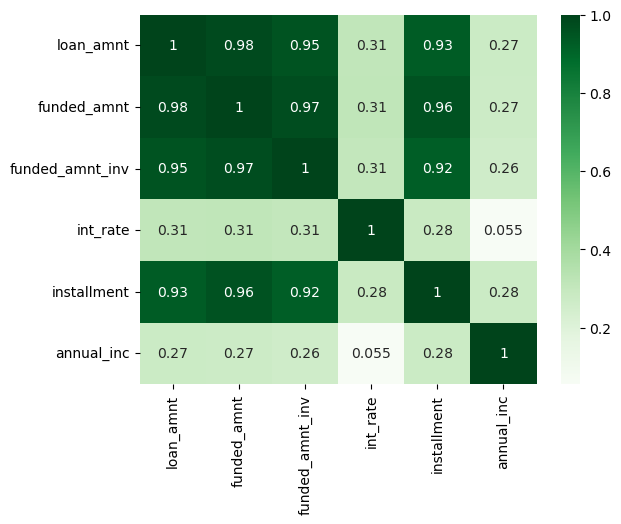

In [248]:
sns.heatmap(corr_columns, annot=True, cmap="Greens")
plt.show()